In [2]:
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [9]:
def plot_cost_function(X, y, estimator=None, max_iters=100, eta0=0.01, params=None, normalize=False):
    if estimator is SGDRegressor:
        if not params:
            params = {
                'loss': 'squared_loss',
                'penalty': 'none',
                'learning_rate': 'constant',
            }
        else:
            params.update(params)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)
    
    if normalize:
        X_train = StandardScaler().fit_transform(X_train)
        Y_train = StandardScaler().fit_transform(Y_train.values.reshape(-1, 1))
        X_test = StandardScaler().fit_transform(X_test)
        Y_test = StandardScaler().fit_transform(Y_test.values.reshape(-1, 1))
    
    cost_history = []
    for it in range(5, max_iters, round(max_iters * 0.01)):
        if estimator is SGDRegressor:
            model = estimator(max_iter=it, eta0=eta0, **params)
        else:
            model = estimator(n_iter=it, alpha=eta0)
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        mse = mean_squared_error(Y_test, Y_pred)
        cost_history.append([it, mse])
    
    iterations, errors = list(zip(*cost_history))
    plt.plot(iterations, errors, '-')
    plt.xlabel("#Iteration")
    plt.ylabel("MSE")

In [4]:
boston = load_boston()
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [5]:
data['MEDV'] = boston.target

In [6]:
data = data[data['MEDV'] != 50]

In [7]:
X = data[["RM", "LSTAT"]]
y = data["MEDV"]

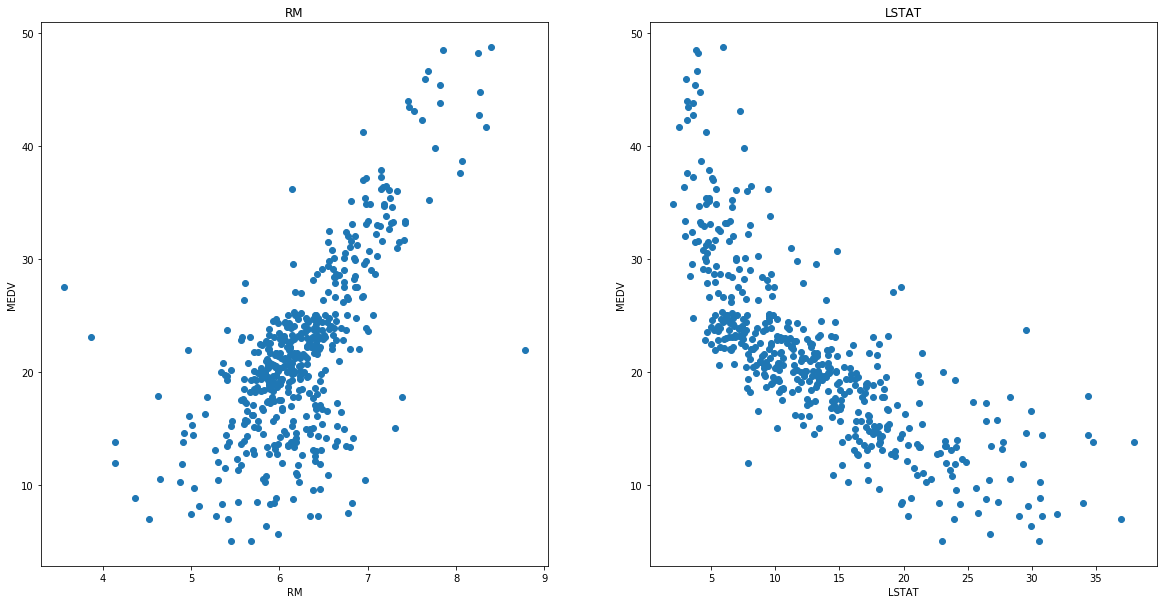

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
for i, col in enumerate(["RM", "LSTAT"]):
    plt.subplot(1, 2, (i+1))
    plt.plot(data[col], data["MEDV"], 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [12]:
import warnings
warnings.filterwarnings('ignore')

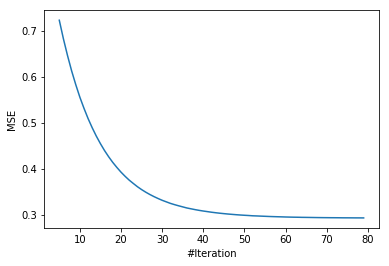

In [17]:
plot_cost_function(X, y, SGDRegressor, normalize=True, max_iters=80, eta0=0.0001)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.33, random_state=18)

In [20]:
X_train = StandardScaler().fit_transform(X_train)
Y_train = StandardScaler().fit_transform(Y_train.values.reshape(-1, 1))
X_test = StandardScaler().fit_transform(X_test)
Y_test = StandardScaler().fit_transform(Y_test.values.reshape(-1, 1))

In [21]:
model = SGDRegressor(loss='squared_loss', penalty='none', learning_rate='constant', max_iter=80, eta0=0.0001)
model.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=80,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [23]:
Y_pred = model.predict(X_test)

In [24]:
mean_squared_error(Y_test, Y_pred)

0.2937329165286351

In [25]:
r2_score(Y_test, Y_pred)

0.7062670834713651

С помощью добавления дополнительного признака в модель, удалось увеличить ее качество: уменьшилась MSE, увеличилось значение зависимости